# **1) Me aseguro poder leer el archivo a trabajar**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

from google.colab import drive
drive.mount("/content/drive")

df = pd.read_csv("/content/drive/MyDrive/Datasets/cancer_mama.csv")
df

Mounted at /content/drive


,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


# **2) Compruebo si hay nulos y que tipos de datos hay en todas las columas**

In [ ]:
df.isnull().sum()

Id                             0
Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id                           699 non-null    int64 
 1   Clump_thickness              699 non-null    int64 
 2   Uniformity_Cell_Size         699 non-null    int64 
 3   Uniformity_Cell_Shape        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


# **3) Detecto un caracter "?", evaluo el peso que tiene para eliminarlo**

In [ ]:
df.Bare_Nuclei.value_counts()   # Detecto un ?

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [ ]:
df = df[df['Bare_Nuclei'] != '?'] # Elimino los Registros con ?
df.Bare_Nuclei.value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [ ]:
df.shape

(683, 11)

In [ ]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype(int)

<ipython-input-7-c3d722a6220c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bare_Nuclei'] = df['Bare_Nuclei'].astype(int)


# **4) Compruebo que todos los datos son numericos**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Id                           683 non-null    int64
 1   Clump_thickness              683 non-null    int64
 2   Uniformity_Cell_Size         683 non-null    int64
 3   Uniformity_Cell_Shape        683 non-null    int64
 4   Marginal_Adhesion            683 non-null    int64
 5   Single_Epithelial_Cell_Size  683 non-null    int64
 6   Bare_Nuclei                  683 non-null    int64
 7   Bland_Chromatin              683 non-null    int64
 8   Normal_Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


# **5) Divido el df en 80/20**

In [ ]:
train_set, test_set = train_test_split(df, test_size=0.20, random_state=33)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
train_set.shape

(546, 11)

In [ ]:
test_set.shape

(137, 11)

# **6) Controlo la proporcionalidad del campo CLASS: df, test_train y set_test,**

# **ASUMO QUE EL CAMPO CLASS ES LA ETIQUETA "y"**

<ipython-input-12-77d953c303c4>:17: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  axs[0].annotate(rect.get_x() + rect.get_width()/2, (0, -20), textcoords="offset points", ha="center")
<ipython-input-12-77d953c303c4>:32: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  axs[1].annotate(rect.get_x() + rect.get_width()/2, (0, -20), textcoords="offset points", ha="center")
<ipython-input-12-77d953c303c4>:47: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  axs[2].annotate(rect.get_x() + rect.get_width()/2, (0, -20), textcoords="offset points", ha="center")


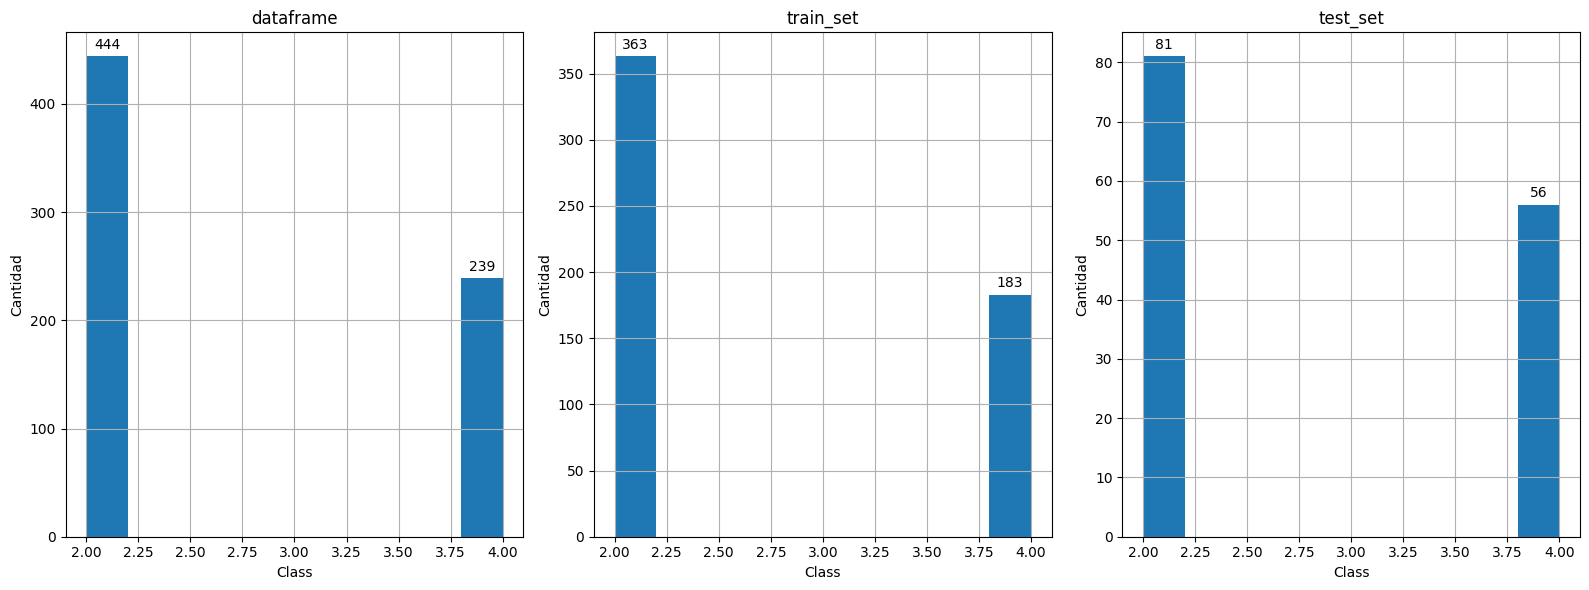

In [ ]:
# Crear la grilla de subplots
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

axs[0].grid(True)
axs[0].hist(df["Class"])
axs[0].set_title("dataframe")
axs[0].set_xlabel("Class")
axs[0].set_ylabel("Cantidad")
axs[0].set_ylim(bottom=0)  # Ajustar el rango del eje y para empezar desde 0

for rect in axs[0].patches:
    height = rect.get_height()
    if height > 0:
        x = rect.get_x() + rect.get_width() / 2
        y = height
        axs[0].annotate(f"{int(height)}", xy=(x, y), xytext=(0, 3), textcoords="offset points", ha="center", va="bottom")
        axs[0].annotate(rect.get_x() + rect.get_width()/2, (0, -20), textcoords="offset points", ha="center")

axs[1].grid(True)
axs[1].hist(train_set["Class"])
axs[1].set_title("train_set")
axs[1].set_xlabel("Class")
axs[1].set_ylabel("Cantidad")
axs[1].set_ylim(bottom=0)  # Ajustar el rango del eje y para empezar desde 0

for rect in axs[1].patches:
    height = rect.get_height()
    if height > 0:
        x = rect.get_x() + rect.get_width() / 2
        y = height
        axs[1].annotate(f"{int(height)}", xy=(x, y), xytext=(0, 3), textcoords="offset points", ha="center", va="bottom")
        axs[1].annotate(rect.get_x() + rect.get_width()/2, (0, -20), textcoords="offset points", ha="center")

axs[2].grid(True)
axs[2].hist(test_set["Class"])
axs[2].set_title("test_set")
axs[2].set_xlabel("Class")
axs[2].set_ylabel("Cantidad")
axs[2].set_ylim(bottom=0)  # Ajustar el rango del eje y para empezar desde 0

for rect in axs[2].patches:
    height = rect.get_height()
    if height > 0:
        x = rect.get_x() + rect.get_width() / 2
        y = height
        axs[2].annotate(f"{int(height)}", xy=(x, y), xytext=(0, 3), textcoords="offset points", ha="center", va="bottom")
        axs[2].annotate(rect.get_x() + rect.get_width()/2, (0, -20), textcoords="offset points", ha="center")

plt.tight_layout()
plt.show()

# **7) Armo los X e y para train_set y test_set**

In [ ]:
# Entrenamos un algoritmo basado en regresión logística
from sklearn.linear_model import LogisticRegression

X_train =  train_set.drop(["Id", "Class"], axis=1)
X_train = X_train.to_numpy()
y_train =  train_set["Class"].copy()
y_train = y_train.values
#y_train = np.squeeze(y_train)

X_test =  test_set.drop(["Id", "Class"], axis=1)
X_test = X_test.to_numpy()
y_test =  test_set["Class"].copy()

#X_train[:5, :]
#X_test[:5, :]

#y_train[:5]
#y_test[:5]

# **8) Genero una Regresion Logística y genero una matriz de confusión**

In [ ]:
# Entrenar el modelo de regresión logística
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

y_train_pred = logistic_model.predict(X_train)  # No se usa = 1

y_test_pred = logistic_model.predict(X_test)


cm1 = confusion_matrix(y_train, y_train_pred)
print(cm1)


[[354   9]
 [ 10 173]]


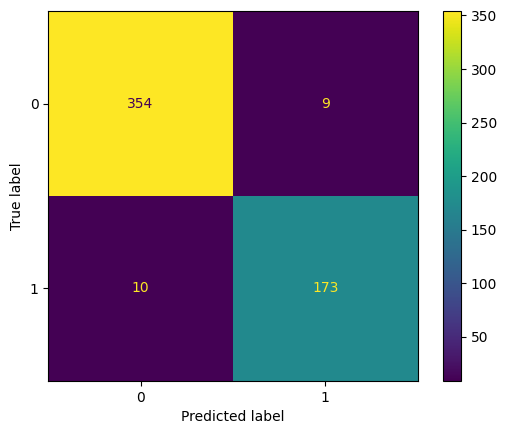

In [ ]:
disp = ConfusionMatrixDisplay(cm1)
disp.plot()

699  Total de Registros

16 Borre con signo ?

Quedaron: 683

683 = 546 (80% Entre.) + 137 (20% Prueba)

Matriz de Confusion:

354 + 173 + 10 + 9 = 546




# **9) Hago una prueba de Predicción con 2 Valores de X_test**

---



In [ ]:
predecir = np.squeeze(X_test[0])
print('Valor a predecir: ' + str(predecir))
print('Predicción: '  + str(logistic_model.predict([predecir])))
print('')
predecir = np.squeeze(X_test[2])
print('Valor a predecir: ' + str(predecir))
print('Predicción: '  + str(logistic_model.predict([predecir])))

Valor a predecir: [5 4 5 1 8 1 3 6 1]
Predicción: [2]

Valor a predecir: [10  8  8  2  8 10  4  8 10]
Predicción: [4]


# **10) Veo los valores de Acuracy y Score**

In [ ]:
print('Acuracy')
print('Score Train: ' , str(logistic_model.score(X_train, y_train)))
print('Score Test: ' , str(logistic_model.score(X_test, y_test)))

Acuracy
Score Train:  0.9652014652014652
Score Test:  0.9781021897810219


In [ ]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_test_pred)))

print('Precision Score : ' + str(precision_score(y_test,y_test_pred, pos_label=2)))

print('Recall Score : ' + str(recall_score(y_test,y_test_pred, pos_label=2)))

print('F1 Score : ' + str(f1_score(y_test,y_test_pred, pos_label=2)))


Accuracy Score : 0.9781021897810219
Precision Score : 0.975609756097561
Recall Score : 0.9876543209876543
F1 Score : 0.9815950920245398


# **11) Ahora vamos a generar una nueva predicción con HIPERPARAMETROS**

In [ ]:
logistic_model1 = LogisticRegression(max_iter=1000)

hiperparametros = {'solver': ['newton-cg', 'lbfgs'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(logistic_model1, param_grid = hiperparametros)

grid_clf_acc.fit(X_train, y_train)
y_train_pred = grid_clf_acc.predict(X_train)  # No se usa = 1
y_test_pred = grid_clf_acc.predict(X_test)

cm2 = confusion_matrix(y_train, y_train_pred)

print(cm2)

[[354   9]
 [ 10 173]]


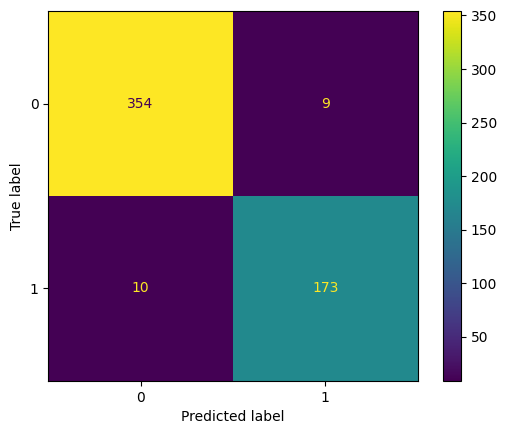

In [ ]:
disp = ConfusionMatrixDisplay(cm2)
disp.plot()

# **12) Veo los valores de Acuracy y Score**

In [ ]:
print('Acuracy')
print('Score Train: ' + str(grid_clf_acc.score(X_train, y_train)))
print('Score Test: ' + str(grid_clf_acc.score(X_test, y_test)))

Acuracy
Score Train: 0.9652014652014652
Score Test: 0.9781021897810219


In [ ]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_test_pred)))

print('Precision Score : ' + str(precision_score(y_test,y_test_pred, pos_label=2)))

print('Recall Score : ' + str(recall_score(y_test,y_test_pred, pos_label=2)))

print('F1 Score : ' + str(f1_score(y_test,y_test_pred, pos_label=2)))

Accuracy Score : 0.9781021897810219
Precision Score : 0.975609756097561
Recall Score : 0.9876543209876543
F1 Score : 0.9815950920245398
